<a href="https://colab.research.google.com/github/mrugeshhs/Capstone9.4.5/blob/master/Peer_Assignment_9_4_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Context:

###### A Bank wants to develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behaviour of about 9000 active credit card holders during the last 6 months. The file at customer level includes Transaction frequency, amount, tenure etc.

## Business Requirements:

###### Bank Marketing team would like to leverage ML to launch target ad campaign that is tailored to specific group of customers.Based on this group or Market segments, marketing strategy will be formed.

###### Following Parameters would help maketing team to formulate better strategy,

* Monthly average spend
* Purchases type (EMI etc)
* Average amount per purchase.
* Clustering segments of credit card holders
* Provide the strategic insights and implementation of strategies for given set of cluster characteristics.

## Data Dictionary:


* CUST_ID: Credit card holder ID
* BALANCE: Monthly average balance (based on daily balance averages)
* BALANCE_FREQUENCY: Ratio of last 12 months with balance
* PURCHASES: Total purchase amount spent during last 12 months
* ONEOFF_PURCHASES: Total amount of one-off purchases
* INSTALLMENTS_PURCHASES: Total amount of installment purchases
* CASH_ADVANCE: Total cash-advance amount
* PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)
* ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases
* CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency
* AVERAGE_PURCHASE_TRX: Average amount per purchase transaction
* CASH_ADVANCE_TRX: Average amount per cash-advance transaction
* PURCHASES_TRX: Average amount per purchase transaction
* CREDIT_LIMIT: Credit limit
* PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period
* MINIMUM_PAYMENTS: Total minimum payments due in the period.
* PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance
* TENURE: Number of months as a customer

In [3]:
#Basic python library which need to import
import pandas as pd
import numpy as np

#Date stuff
from datetime import datetime
from datetime import timedelta

#Library for Nice graphing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

#Library for statistics operation
import scipy.stats as stats

# Date Time library
from datetime import datetime

#Machine learning Library
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import Data

In [5]:
# reading data into dataframe
credit= pd.read_csv("/content/sample_data/marketing_data.csv")

### Info on Data

In [6]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
# Find the total number of missing values in the dataframe
print ("\nMissing values :  ", credit.isnull().sum().values.sum())

# printing total numbers of Unique value in the dataframe. 
print ("\nUnique values :  \n",credit.nunique())


Missing values :   314

Unique values :  
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [9]:
credit.shape

(8950, 18)

In [10]:
# Intital descriptive analysis of data.
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Missing Value Treatment
   - Since there are missing values in the data so we are imputing them with median

In [11]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [12]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so we need to remove with median.

credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)

credit['CREDIT_LIMIT'].count()


credit['MINIMUM_PAYMENTS'].median()
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)

In [13]:
# Now again check the missing values.

credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

## Analysis

* Monthly_avg_purchase

In [14]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']


In [15]:
print(credit['Monthly_avg_purchase'].head(),'\n ',
credit['TENURE'].head(),'\n', credit['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
  0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


* Purchases by type (one-Time, EMI)
To find what type of purchases customers are making on credit card

In [17]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [19]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'
credit['purchase_type']=credit.apply(purchase,axis=1)
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

* Average payment_minpayment ratio for each purchse type.

In [22]:
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)
# log tranformation
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.237, 13.259, 10.087,  5.571])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

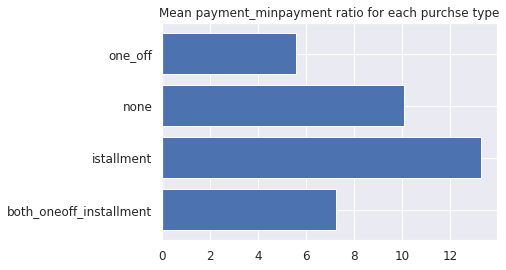

In [24]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

In [25]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,6840.528861


* Average Cash advance for different purchase type

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

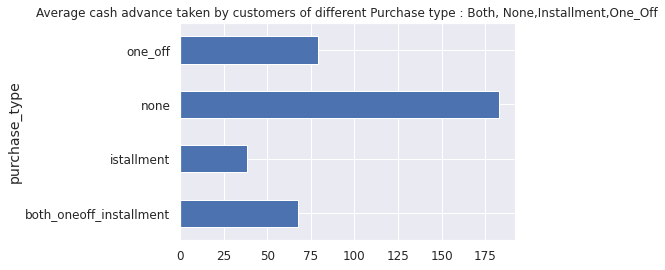

In [26]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

### Prepare for ML algo

* Convert Categorical type to numeric

In [27]:
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

In [28]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

,both_oneoff_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


* Now merge the created dummy with the original data frame

In [29]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)
l=['purchase_type']
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
payment_minpay                      False
both_oneoff_installment             False
istallment                          False
none                                False
one_off                             False
dtype: bool

In [30]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   Monthly_avg_purchase              8950 non-null   float64
 10  Monthly_cash_advance              8950 non-null   float64
 11  payment_minpay                    8950 non-null   float64
 12  both_o

In [31]:
cr_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,payment_minpay,both_oneoff_installment,istallment,none,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,1.327360,0,0,0,1


#### Standardrizing data to put data on the same scale

In [33]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
cr_dummy.shape
cr_scaled=sc.fit_transform(cr_dummy)
cr_scaled

array([[-0.149, -0.987,  0.394, ...,  1.721, -0.544, -0.515],
       [ 0.18 , -0.987, -1.087, ..., -0.581,  1.839, -0.515],
       [ 0.493,  1.062, -1.087, ..., -0.581, -0.544,  1.943],
       ...,
       [-0.093, -0.987,  0.528, ...,  1.721, -0.544, -0.515],
       [-0.093, -0.987, -1.087, ..., -0.581,  1.839, -0.515],
       [-0.734,  1.169, -1.087, ..., -0.581, -0.544,  1.943]])

In [35]:
from sklearn.decomposition import PCA
cr_dummy.shape


(8950, 16)

In [37]:
#We have 17 features so our n_component will be 17.
pc=PCA(n_components=16)
cr_pca=pc.fit(cr_scaled)
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

0.9999999999999999

In [39]:
var_ratio={}
for n in range(2,17):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)
var_ratio

{2: 0.604535429815473,
 3: 0.7523237737638364,
 4: 0.8277351674431126,
 5: 0.8918344465720279,
 6: 0.9360020967375567,
 7: 0.958768842838187,
 8: 0.9719117200504412,
 9: 0.9823137590482119,
 10: 0.9890321813279155,
 11: 0.9922882829824956,
 12: 0.995101211987939,
 13: 0.9978339015619124,
 14: 0.9996130214596871,
 15: 0.9999999999999999,
 16: 0.9999999999999999}

In [40]:
pc=PCA(n_components=6)
p=pc.fit(cr_scaled)
cr_scaled.shape

(8950, 16)

In [41]:
pc_final=PCA(n_components=6).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)
dd=pd.DataFrame(reduced_cr)
dd.head()

,0,1,2,3,4,5
0,-0.445407,-2.510272,-0.760003,-0.356950,-0.328138,0.042454
1,-3.963101,0.188451,0.817180,0.919068,0.006317,-0.574584
2,1.302356,1.899049,-2.626775,-1.430400,-0.942279,-0.563257
3,-1.120625,1.213405,-2.319355,-1.466779,-0.106320,1.433882
4,-1.368763,0.103096,-2.676027,-0.553731,-0.755344,-0.682730


In [42]:
col_list=cr_dummy.columns
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'payment_minpay', 'both_oneoff_installment',
       'istallment', 'none', 'one_off'],
      dtype='object')

In [43]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.044578,0.165818,0.269513,-0.264321,-0.543260,-0.672686
ONEOFF_PURCHASES,0.221448,0.440820,-0.156637,0.015302,-0.016032,0.129115
INSTALLMENTS_PURCHASES,0.316924,-0.169205,0.283776,0.067357,0.047355,0.112619
PURCHASES_FREQUENCY,0.351833,-0.031453,0.144179,-0.142127,0.031055,-0.079586
ONEOFF_PURCHASES_FREQUENCY,0.221637,0.384754,-0.085531,0.047451,-0.040705,-0.095403
PURCHASES_INSTALLMENTS_FREQUENCY,0.300462,-0.186736,0.290743,-0.012153,0.015274,0.007074
CASH_ADVANCE_FREQUENCY,-0.207174,0.247415,0.379036,-0.202165,0.247439,0.068105
CASH_ADVANCE_TRX,-0.221858,0.251450,0.386250,-0.179375,0.232752,0.083279
PURCHASES_TRX,0.363098,0.069195,0.103554,-0.109514,0.051705,-0.009717
Monthly_avg_purchase,0.352345,0.128697,-0.015668,-0.161994,0.138381,0.012501


### Clustering

* starting with 4 clusters.

In [44]:
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [45]:
km_4.labels_
pd.Series(km_4.labels_).value_counts()

1    2769
2    2232
0    2078
3    1871
dtype: int64

* cluster_range = range( 1, 21 )Here we donot have known k value so we will find the K. To do that we need to take a cluster range between 1 and 21.

In [47]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,134035.500253
1,2,88425.778423
2,3,65866.867818
3,4,44631.748778
4,5,38307.521244
5,6,33882.667084
6,7,30579.806925
7,8,27923.672701
8,9,26276.989480
9,10,23696.080027


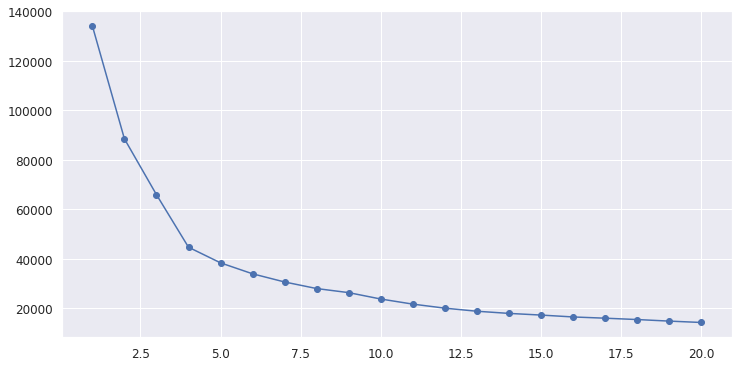

In [48]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [49]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_
pd.Series(km_5.labels_).value_counts()

3    2181
1    2073
0    1984
2    1864
4     848
dtype: int64

Text(0, 0.5, 'PC_1')

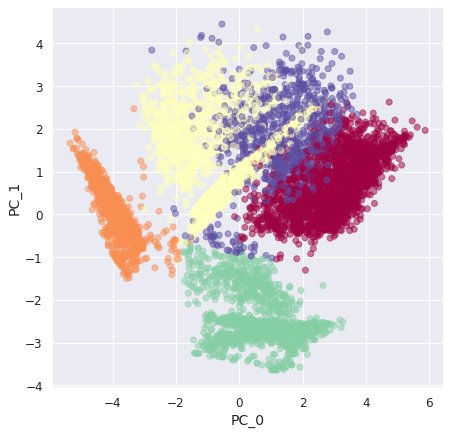

In [50]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [53]:
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','istallment','one_off','none','CREDIT_LIMIT']
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [58]:
# Finding Mean of features for each cluster
cluster_5 = cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_5

Cluster_5,0,1,2,3,4
PURCHASES_TRX,34.501008,0.024120,7.086910,11.917011,28.245283
Monthly_avg_purchase,209.169344,0.064284,68.846861,47.287449,147.026040
Monthly_cash_advance,3.760209,185.211776,75.993788,23.616800,249.750029
CASH_ADVANCE_TRX,0.142137,6.446213,2.773605,0.665750,10.389151
payment_minpay,8.500536,9.990736,5.570556,13.611466,4.048983
both_oneoff_installment,1.000000,0.000000,0.000536,0.000000,0.930425
istallment,0.000000,0.013025,0.000000,1.000000,0.061321
one_off,0.000000,0.001930,0.999464,0.000000,0.008255
none,0.000000,0.985046,0.000000,0.000000,0.000000
CREDIT_LIMIT,5679.139581,4049.622126,4501.521004,3251.863083,5988.679245


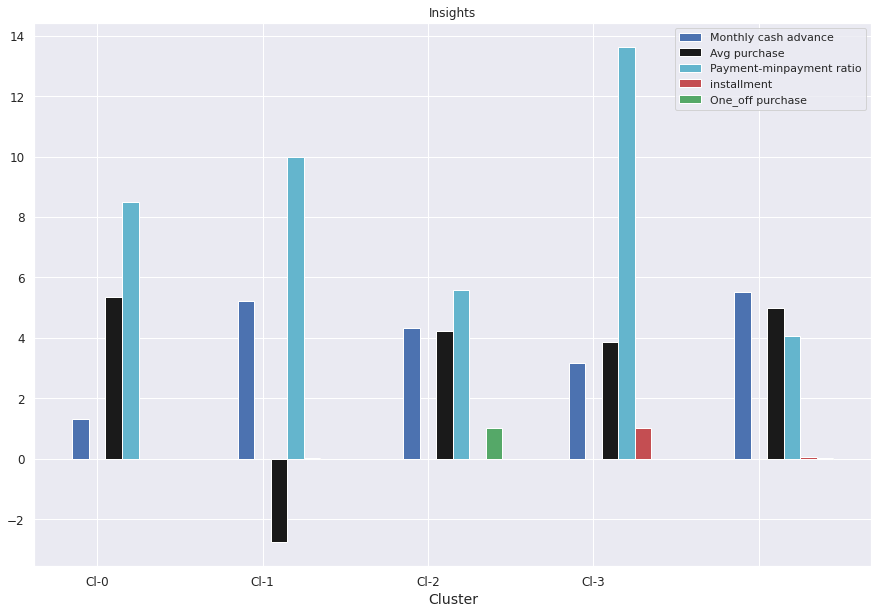

In [61]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_5.columns))

cash_advance=np.log(cluster_5.loc['Monthly_cash_advance',:].values)
#credit_score=(cluster_5.loc['limit_usage',:].values)
purchase= np.log(cluster_5.loc['Monthly_avg_purchase',:].values)
payment=cluster_5.loc['payment_minpay',:].values
installment=cluster_5.loc['istallment',:].values
one_off=cluster_5.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
#b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

#### Performing for k=4


In [62]:
km_4=KMeans(n_clusters=4,random_state=123)
km_4=km_4.fit(reduced_cr)
km_4.labels_
pd.Series(km_4.labels_).value_counts()

1    2769
2    2232
0    2078
3    1871
dtype: int64

Text(0, 0.5, 'PC_1')

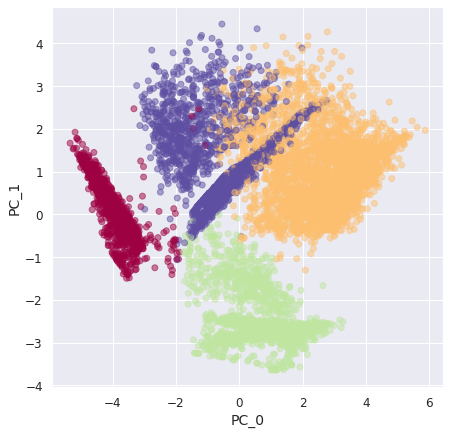

In [63]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_4.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [64]:
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [65]:
# Finding Mean of features for each cluster
cluster_4 = cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,0.032724,33.013723,12.028226,7.120791
Monthly_avg_purchase,0.095150,193.008043,47.500134,69.807860
Monthly_cash_advance,186.013463,67.466910,34.131987,78.470609
CASH_ADVANCE_TRX,6.509143,2.804261,1.049731,2.909139
payment_minpay,9.972791,7.245651,13.380287,5.573518
both_oneoff_installment,0.001925,1.000000,0.000000,0.000534
istallment,0.013474,0.000000,1.000000,0.000000
one_off,0.001925,0.000000,0.000000,0.999466
none,0.982676,0.000000,0.000000,0.000000
CREDIT_LIMIT,4050.946423,5736.732730,3344.136821,4519.954651


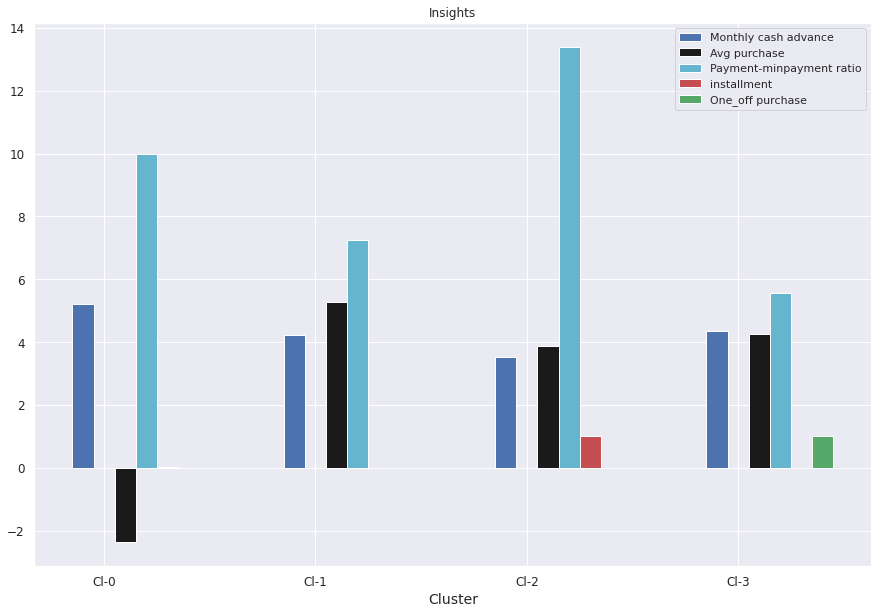

In [66]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
#credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
#b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()